## **Objective:** Analyze the FIFA ranking dataset to understand the progression of countries' rankings over time, and possibly detect patterns or anomalies.

**This Analysis with emonstrate the following Apache Beam features:**

**Reading Data (Pipeline IO)**: Load the FIFA ranking dataset.

**Composite Transform:** Combine multiple simple transforms.

**ParDo:** A parallel processing step.

**Windowing and Triggers:** Aggregate data based on time windows and define conditions to execute the aggregation.

## **Inspect the Dataset**

In [1]:
from google.colab import files

uploaded = files.upload()

Saving fifa_ranking.csv to fifa_ranking.csv


In [2]:
import pandas as pd

# Load the dataset
fifa_data = pd.read_csv('fifa_ranking.csv')

# Display the first few rows of the dataset
fifa_data.head()


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


The FIFA ranking dataset provides the following columns:

**rank**: FIFA ranking of the country.

**country_full**: Full name of the country.

**country_abrv**: Abbreviation of the country name.

**total_points**: Current total points of the country in the FIFA ranking.

**previous_points**: Previous points of the country in the FIFA ranking.

**rank_change**: Change in rank since the last evaluation.

**cur_year_avg**: Average points over the current year.

**cur_year_avg_weighted**: Weighted average points over the current year.

**last_year_avg**: Average points over the last year.

**last_year_avg_weighted**: Weighted average points over the last year.

**two_year_ago_avg:** Average points from two years ago.

**two_year_ago_weighted**: Weighted average points from two years ago.

**three_year_ago_avg**: Average points from three years ago.

**three_year_ago_weighted**: Weighted average points from three years ago.

**confederation**:The football confederation to which the country belongs.

**rank_date:** Date of the ranking.

## **Reading Data using Apache Beam (Pipeline IO)**

In [3]:
!pip install apache-beam


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 89.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 24.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 109.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 77.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 671.3/671.3 kB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 108.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 34.3

In [4]:
import apache_beam as beam

# Define a simple transform to print the data
def print_row(row):
    print(row)

# Create a pipeline to read the CSV and print data
with beam.Pipeline() as pipeline:
    (
        pipeline
        | 'Read CSV' >> beam.io.ReadFromText('fifa_ranking.csv', skip_header_lines=1)
        | 'Split Rows' >> beam.Map(lambda line: line.split(','))
        | 'Print Rows' >> beam.Map(print_row)
    )


Streaming output truncated to the last 5000 lines.
['25', 'Poland', 'POL', '0.0', '672', '0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', 'UEFA', '2005-01-19']
['26', 'Colombia', 'COL', '0.0', '669', '0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', 'CONMEBOL', '2005-01-19']
['27', 'Costa Rica', 'CRC', '0.0', '668', '0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', 'CONCACAF', '2005-01-19']
['28', 'Romania', 'ROU', '0.0', '664', '1', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', 'UEFA', '2005-01-19']
['29', 'Paraguay', 'PAR', '0.0', '661', '1', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', 'CONMEBOL', '2005-01-19']
['30', 'Senegal', 'SEN', '0.0', '657', '1', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', 'CAF', '2005-01-19']
['30', 'Saudi Arabia', 'KSA', '0.0', '665', '-2', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', 'AFC', '2005-01-19']
['32', 'Russia', 'RUS', '0.0', '652', '0', '0.0', '0.0', '0.0', '0.0', '0.0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
['63', 'Guinea', 'GUI', '544.34', '573', '-8', '246.34', '246.34', '320.12', '160.06', '273.65', '82.1', '279.21', '55.84', 'CAF', '2016-07-14']
['64', 'Slovenia', 'SVN', '542.19', '567', '-7', '224.33', '224.33', '312.78', '156.39', '361.22', '108.37', '265.5', '53.1', 'UEFA', '2016-07-14']
['65', 'Saudi Arabia', 'KSA', '539.73', '545', '0', '360.64', '360.64', '160.94', '80.47', '222.79', '66.84', '158.89', '31.78', 'AFC', '2016-07-14']
['65', 'Finland', 'FIN', '539.72', '536', '2', '350.41', '350.41', '103.95', '51.98', '245.9', '73.77', '317.85', '63.57', 'UEFA', '2016-07-14']
['67', 'South Africa', 'RSA', '530.44', '529', '1', '283.41', '283.41', '266.31', '133.16', '174.8', '52.44', '307.15', '61.43', 'CAF', '2016-07-14']
['68', 'Benin', 'BEN', '525.02', '473', '7', '362.16', '362.16', '164.48', '82.24', '218.01', '65.4', '76.11', '15.22', 'CAF', '2016-07-14']
['69', 'Uganda', 'UGA', '522.13', '500', '3', '291.3', '291.3', '275.2

This pipeline does the following:

Reads the CSV file.
Splits each line (row) into columns using the comma delimiter.
Prints each row.

**First 10**

In [10]:
import apache_beam as beam

# Define a transform to print the data
def print_row(row):
    print(row)

# Create a pipeline to read the CSV and print the first 10 rows
with beam.Pipeline() as pipeline:
    (
        pipeline
        | 'Read CSV' >> beam.io.ReadFromText('fifa_ranking.csv', skip_header_lines=1)
        | 'Split Rows' >> beam.Map(lambda line: line.split(','))
        | 'Take first 10 Rows' >> beam.transforms.combiners.Sample.FixedSizeGlobally(10)
        | 'Flatten Lists' >> beam.FlatMap(lambda x: x)
        | 'Print Rows' >> beam.Map(print_row)
    )


['34', 'Tunisia', 'TUN', '0.0', '40', '-3', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', 'CAF', '1993-09-23']
['85', 'New Zealand', 'NZL', '0.0', '477', '-2', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', 'OFC', '2002-02-13']
['94', 'Northern Ireland', 'NIR', '0.0', '437', '-1', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', 'UEFA', '2001-01-17']
['75', 'Belarus', 'BLR', '0.0', '489', '-1', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', 'UEFA', '2002-11-20']
['127', 'El Salvador', 'SLV', '223.49', '234', '-6', '0.0', '0.0', '187.58', '93.79', '276.06', '82.82', '234.4', '46.88', 'CONCACAF', '2014-08-14']
['165', 'Cayman Islands', 'CAY', '0.0', '205', '-4', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', 'CONCACAF', '2001-10-17']
['114', 'Swaziland', 'SWZ', '0.0', '387', '5', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', 'CAF', '2003-06-25']
['75', 'Congo DR', 'COD', '0.0', '454', '-5', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0

## **Composite Transform**

A composite transform bundles multiple transforms into one.

 Creating composite transform that:

1. Filters out rows before the year 2000.
2. Calculates the average rank for each country from 2000 onwards.

This will give an idea of which countries have been consistently high or low ranked in the past couple of decades.

In [6]:
class FilterAndAverage(beam.PTransform):
    def expand(self, pcoll):
        return (
            pcoll
            # Extract year from rank_date and filter rows after 2000
            | 'Filter Year' >> beam.Filter(lambda row: int(row[-1].split('-')[0]) >= 2000)

            # Extract country and rank, then calculate the average rank for each country
            | 'Extract Country and Rank' >> beam.Map(lambda row: (row[1], int(row[0])))
            | 'Average Rank' >> beam.CombinePerKey(beam.combiners.MeanCombineFn())

            # Sort countries by average rank
            | 'Sort by Rank' >> beam.Map(lambda country_rank: (country_rank[1], country_rank[0]))
            | 'Order Countries' >> beam.transforms.combiners.Top.Smallest(10)
        )

# Create a pipeline using the composite transform
with beam.Pipeline() as pipeline:
    (
        pipeline
        | 'Read CSV' >> beam.io.ReadFromText('fifa_ranking.csv', skip_header_lines=1)
        | 'Split Rows' >> beam.Map(lambda line: line.split(','))
        | 'Filter and Average' >> FilterAndAverage()
        | 'Print Results' >> beam.Map(print_row)
    )


[(3.7625570776255706, 'Brazil'), (4.114155251141552, 'Argentina'), (4.703196347031963, 'Spain'), (5.712328767123288, 'Germany'), (8.315068493150685, 'Portugal'), (8.639269406392694, 'Netherlands'), (8.89041095890411, 'France'), (8.904109589041095, 'Italy'), (9.849315068493151, 'England'), (11.735294117647058, 'Yugoslavia')]


In [21]:
import apache_beam as beam

# List to store data
fifa_data_list = []

# Define a simple transform to add data to the list
def add_to_list(row):
    fifa_data_list.append(row)

# Create a pipeline to read the CSV and add data to the list
with beam.Pipeline() as pipeline:
    (
        pipeline
        | 'Read CSV' >> beam.io.ReadFromText('fifa_ranking.csv', skip_header_lines=1)
        | 'Split Rows' >> beam.Map(lambda line: line.split(','))
        | 'Add to List' >> beam.Map(add_to_list)
    )


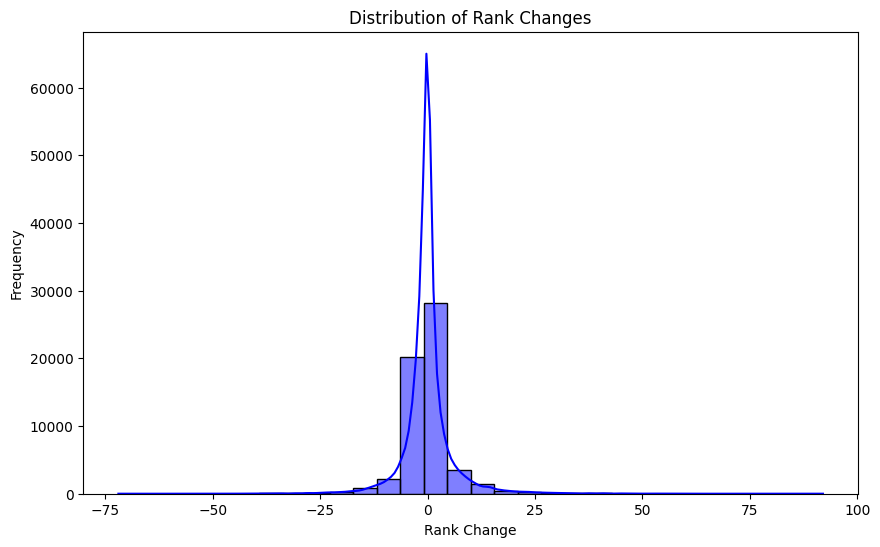

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract rank changes from the list
rank_changes = [int(row[5]) for row in fifa_data_list]

# Create histogram
plt.figure(figsize=(10, 6))
sns.histplot(rank_changes, bins=30, kde=True, color='blue')
plt.title("Distribution of Rank Changes")
plt.xlabel("Rank Change")
plt.ylabel("Frequency")
plt.show()


The FilterAndAverage composite transform performs the following steps:

Filters out rows with rank dates before the year 2000.
Extracts the country name and rank.
Calculates the average rank for each country from 2000 onwards.
Returns the top 10 countries with the lowest average rank (i.e., the best-ranked countries).

## **ParDo (Parallel Processing)**

ParDo is a parallel processing step in Beam.

 Create a ParDo transform that identifies significant rank jumps for countries. A "significant jump" can be defined as a change of more than 10 places. This will help spot surprising moments in football history!

 DoFn (a function to be used with ParDo) that processes each row and checks for significant rank changes.

In [7]:
class DetectSignificantJump(beam.DoFn):
    def process(self, row):
        country = row[1]
        rank_change = int(row[5])

        if abs(rank_change) > 10:
            yield f"{country} had a significant rank change of {rank_change} places."

# Create a pipeline using ParDo
with beam.Pipeline() as pipeline:
    (
        pipeline
        | 'Read CSV' >> beam.io.ReadFromText('fifa_ranking.csv', skip_header_lines=1)
        | 'Split Rows' >> beam.Map(lambda line: line.split(','))
        | 'Detect Jumps' >> beam.ParDo(DetectSignificantJump())
        | 'Print Results' >> beam.Map(print_row)
    )


Mexico had a significant rank change of 11 places.
Colombia had a significant rank change of 16 places.
Ecuador had a significant rank change of 30 places.
Korea Republic had a significant rank change of 13 places.
Bulgaria had a significant rank change of -11 places.
Japan had a significant rank change of 23 places.
China PR had a significant rank change of 11 places.
Canada had a significant rank change of 11 places.
Yugoslavia had a significant rank change of -27 places.
Iraq had a significant rank change of 25 places.
Bolivia had a significant rank change of 28 places.
Kuwait had a significant rank change of 11 places.
Korea DPR had a significant rank change of 16 places.
El Salvador had a significant rank change of -12 places.
Turkey had a significant rank change of -21 places.
Malawi had a significant rank change of -15 places.
Zaire had a significant rank change of -11 places.
Singapore had a significant rank change of 16 places.
Malaysia had a significant rank change of 16 plac

In this pipeline, the DetectSignificantJump transform checks each row to see if the rank change exceeds 10 places (in either direction). If it does, it yields a message indicating the country and the change.

First 10

In [14]:
class DetectSignificantJump(beam.DoFn):
    def process(self, row):
        country = row[1]
        rank_change = int(row[5])

        if abs(rank_change) > 10:
            yield f"{country} had a significant rank change of {rank_change} places."

# Create a pipeline using ParDo
with beam.Pipeline() as pipeline:
    (
        pipeline
        | 'Read CSV' >> beam.io.ReadFromText('fifa_ranking.csv', skip_header_lines=1)
        | 'Split Rows' >> beam.Map(lambda line: line.split(','))
        | 'Detect Jumps' >> beam.ParDo(DetectSignificantJump())
        | 'Take First 20' >> beam.transforms.combiners.Top.Of(20, lambda x: 1)
        | 'Print Results' >> beam.Map(print_row)
    )




['Bermuda had a significant rank change of -18 places.', 'Malaysia had a significant rank change of 16 places.', 'Singapore had a significant rank change of 16 places.', 'Zaire had a significant rank change of -11 places.', 'Malawi had a significant rank change of -15 places.', 'Turkey had a significant rank change of -21 places.', 'El Salvador had a significant rank change of -12 places.', 'Korea DPR had a significant rank change of 16 places.', 'Kuwait had a significant rank change of 11 places.', 'Bolivia had a significant rank change of 28 places.', 'Iraq had a significant rank change of 25 places.', 'Yugoslavia had a significant rank change of -27 places.', 'Canada had a significant rank change of 11 places.', 'China PR had a significant rank change of 11 places.', 'Japan had a significant rank change of 23 places.', 'Bulgaria had a significant rank change of -11 places.', 'Korea Republic had a significant rank change of 13 places.', 'Ecuador had a significant rank change of 30 pl

## **Windowing and Triggers**

Windowing and triggers are typically used in streaming data scenarios. They allow processing data in chunks (windows) and determine when to produce results based on conditions (triggers).

For this dataset, which is batch and not streaming, the concept will be demonstrated by creating fixed windows of data based on the rank date.  Aggregate data in 5-year windows and compute the average rank for each country in each window

In [12]:
# Convert rank_date string to a datetime object
def to_datetime(row):
    row[-1] = pd.to_datetime(row[-1])
    return row

# Create a pipeline with windowing
with beam.Pipeline() as pipeline:
    (
        pipeline
        | 'Read CSV' >> beam.io.ReadFromText('fifa_ranking.csv', skip_header_lines=1)
        | 'Split Rows' >> beam.Map(lambda line: line.split(','))
        | 'Convert to Datetime' >> beam.Map(to_datetime)

        # Create 5-year fixed windows based on rank_date
        | '5-year Window' >> beam.WindowInto(beam.window.FixedWindows(5*365, offset=-1))

        # Extract country and rank, then calculate the average rank for each country in the window
        | 'Extract Country and Rank' >> beam.Map(lambda row: (row[1], int(row[0])))
        | 'Average Rank' >> beam.CombinePerKey(beam.combiners.MeanCombineFn())

        | 'Print Results' >> beam.Map(print_row)
    )


('Germany', 5.104895104895105)
('Italy', 8.353146853146853)
('Switzerland', 31.34965034965035)
('Sweden', 22.29020979020979)
('Argentina', 5.454545454545454)
('Republic of Ireland', 32.43006993006993)
('Russia', 23.234265734265733)
('Brazil', 3.1713286713286712)
('Norway', 31.762237762237763)
('Denmark', 20.293706293706293)
('England', 10.653846153846153)
('France', 8.958041958041958)
('Spain', 5.321678321678322)
('Mexico', 14.751748251748252)
('RCS', 18.2)
('Netherlands', 8.888111888111888)
('Nigeria', 39.04545454545455)
('Belgium', 30.31118881118881)
('Colombia', 20.46853146853147)
('Poland', 37.40559440559441)
('Romania', 23.59090909090909)
('Uruguay', 23.146853146853147)
('Portugal', 11.346153846153847)
('Cameroon', 35.94055944055944)
('Zambia', 57.43006993006993)
('Egypt', 34.19230769230769)
('Wales', 63.13636363636363)
('USA', 20.433566433566433)
("Côte d'Ivoire", 35.58741258741259)
('Scotland', 41.01398601398601)
('Tunisia', 36.49650349650349)
('Greece', 28.6993006993007)
('Moro

In [19]:
import apache_beam as beam

# List to store rank changes
rank_changes_list = []

class ExtractRankChanges(beam.DoFn):
    def process(self, row):
        rank_change = int(row[5])
        yield rank_change

# Create a pipeline to extract rank changes
with beam.Pipeline() as pipeline:
    rank_changes = (
        pipeline
        | 'Read CSV' >> beam.io.ReadFromText('fifa_ranking.csv', skip_header_lines=1)
        | 'Split Rows' >> beam.Map(lambda line: line.split(','))
        | 'Get Rank Changes' >> beam.ParDo(ExtractRankChanges())
    )

    # Add the results to the rank_changes_list
    rank_changes | 'Add to List' >> beam.Map(rank_changes_list.append)

# Print the first 10 rank changes to verify
print(rank_changes_list[:10])



[]


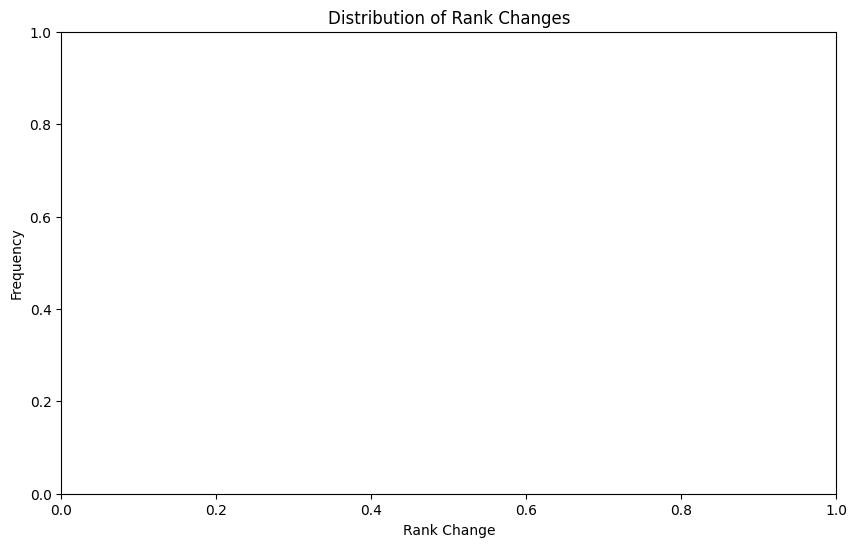

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create histogram
plt.figure(figsize=(10, 6))
sns.histplot(rank_changes_list, bins=30, kde=True, color='blue')
plt.title("Distribution of Rank Changes")
plt.xlabel("Rank Change")
plt.ylabel("Frequency")
plt.show()
